In [2]:
import bs4
import urllib.request as url

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Fetching Data

In [4]:
matches = pd.read_csv('matches.csv')


In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
deliveries = pd.read_csv('deliveries.csv')

In [7]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Finding out the player who got run out maximum times

In [45]:
run_out=deliveries[deliveries['dismissal_kind']=='run out']


Text(0.5,1,'Run out frequency')

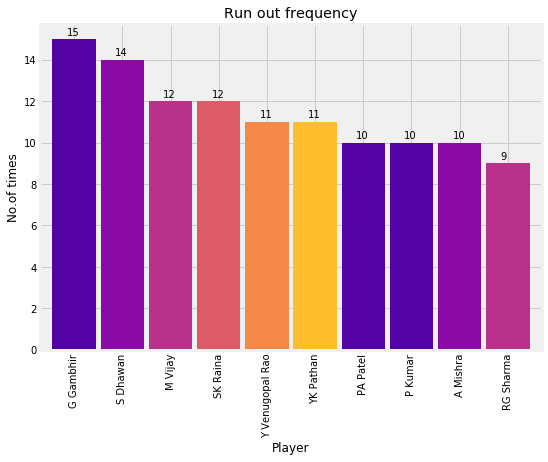

In [57]:
plt.figure(figsize=(8,6))
axes=pd.value_counts(run_out['player_dismissed']).head(10).plot.bar(color=sns.color_palette('plasma'), width=0.9)
for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.2))
plt.ylabel('No.of times')
plt.xlabel('Player')
plt.title('Run out frequency')

# Finding out top 10 scores by a player in IPL history

Text(0.5,1,'Top Scores')

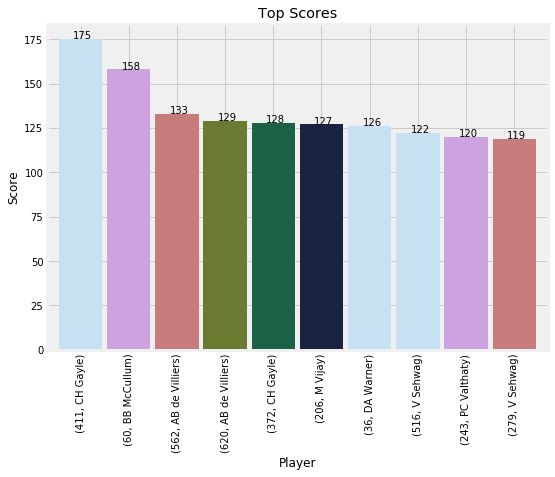

In [65]:
plt.figure(figsize=(8,6))
axes=deliveries.groupby(['match_id','batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(color=sns.color_palette('cubehelix_r'), width=0.9)
for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.2))
plt.ylabel('Score')
plt.xlabel('Player')
plt.title('Top Scores')

# Finding out top 10 players who faced most deliveries in IPL history

Text(0.5,1,'Deliveries faced')

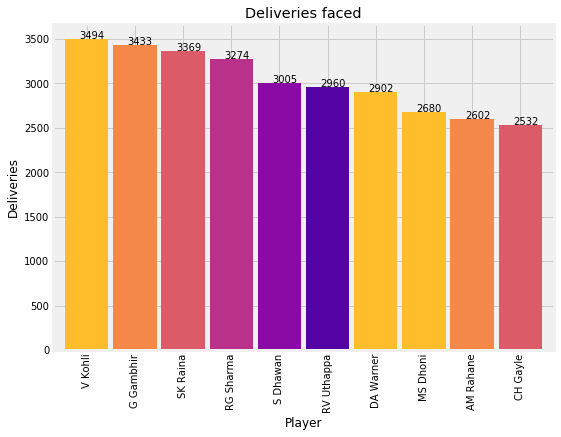

In [54]:
plt.figure(figsize=(8,6))
axes =pd.value_counts(deliveries['batsman']).head(10).plot.bar(color=sns.color_palette('plasma_r'), width=0.9)
for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 3))
plt.ylabel('Deliveries')
plt.xlabel('Player')
plt.title("Deliveries faced")

# Finding out Top 10 teams who have won toss maximum times

In [14]:
toss_df=pd.value_counts(matches['toss_winner']).head(10)

In [15]:
toss_df

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Name: toss_winner, dtype: int64

Text(0.5,1,'Most Toss Wins in IPL')

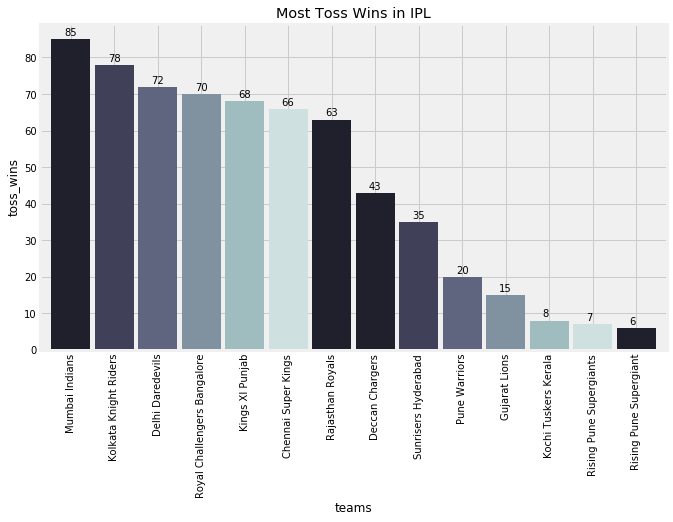

In [85]:
plt.figure(figsize=(10,6))
axes = matches['toss_winner'].value_counts().plot.bar(color=sns.color_palette('bone'), width=0.9)

for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1))
plt.ylabel('toss_wins')
plt.xlabel('teams')
plt.title("Most Toss Wins in IPL")

# Finding number of matches in every season

In [16]:
pd.value_counts(matches['season'])

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

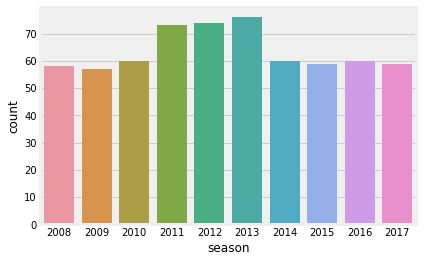

In [17]:
sns.countplot(x='season', data=matches)

# Plotting graph to depict whether teams choose to bat or bowl on winning the toss

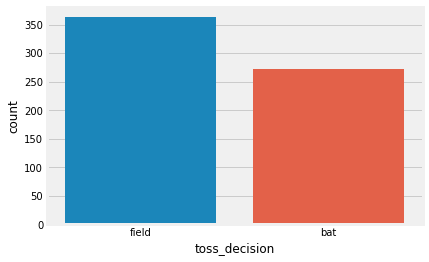

In [18]:
sns.countplot(x='toss_decision', data=matches)

# Analysing toss decisions season wise

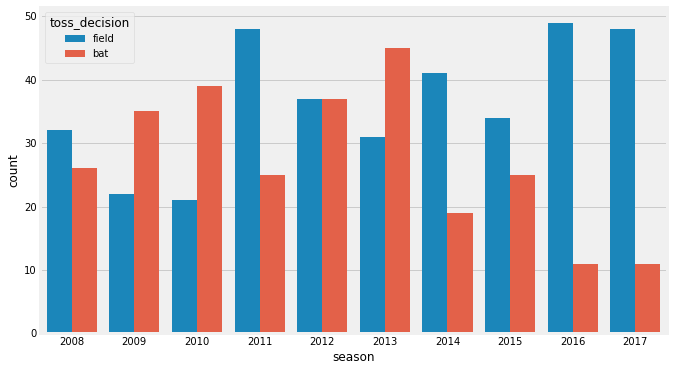

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=matches, hue='toss_decision')

# Showing teams along with their total toss wins in all season

Text(0.5,1,'Most Toss Wins in IPL')

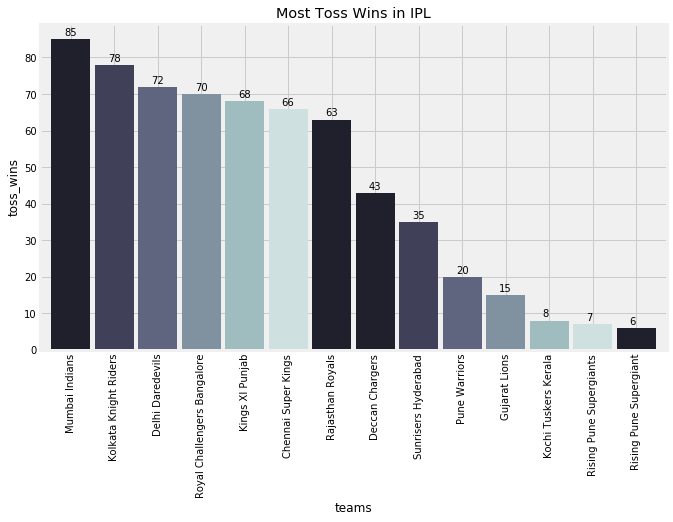

In [84]:
plt.figure(figsize=(10,6))
axes = matches['toss_winner'].value_counts().plot.bar(color=sns.color_palette('bone'), width=0.9)

for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1))
plt.ylabel('toss_wins')
plt.xlabel('teams')
plt.title("Most Toss Wins in IPL")

# Finding top teams according to the matches they have won 

In [20]:
pd.value_counts(matches['winner'])

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

Text(0.5,1,'Most Wins in IPL')

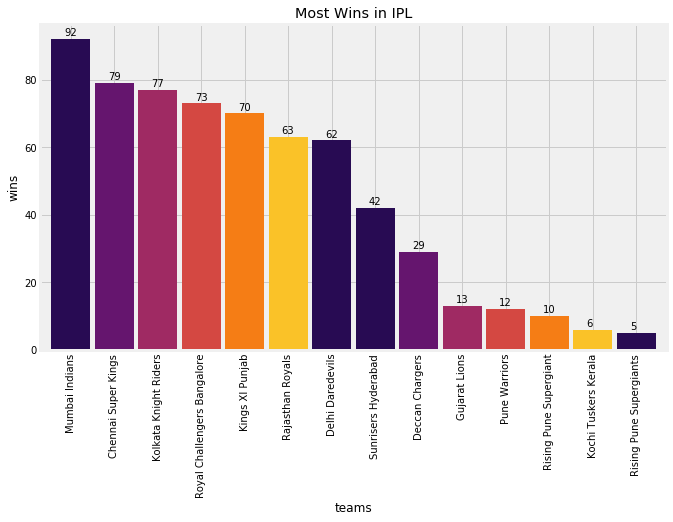

In [42]:
plt.figure(figsize=(10,6))
axes = matches['winner'].value_counts().plot.bar(color=sns.color_palette('inferno'), width=0.9)

for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1))
plt.ylabel('wins')
plt.xlabel('teams')
plt.title("Most Wins in IPL")

# finding out top players who have won player of the match award most times 

In [34]:
pd.value_counts(matches['player_of_match']).head(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
SK Raina          14
RG Sharma         14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

Text(0.5,1,'Player of the match ')

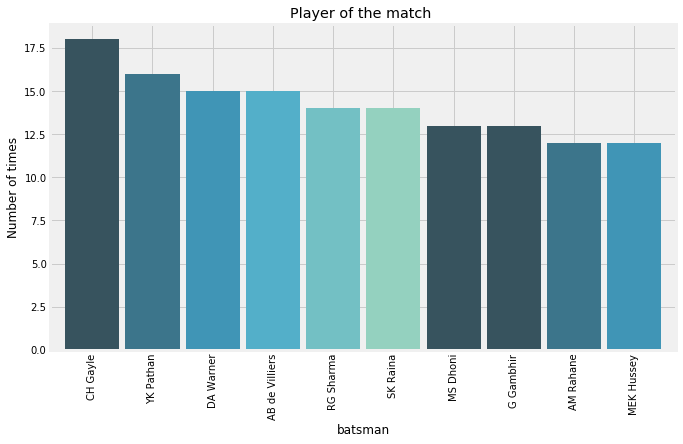

In [83]:
plt.figure(figsize=(10,6))
pd.value_counts(matches['player_of_match']).sort_values(ascending=False).head(10).plot.bar(color=sns.color_palette('GnBu_d'), width=0.9)


plt.ylabel('Number of times')
plt.xlabel('batsman')
plt.title("Player of the match ")

# Finding top batsman who have scored most number of sixes

In [8]:
six_df = deliveries[deliveries['batsman_runs'] == 6]

Text(0.5,1,'Most six by a player')

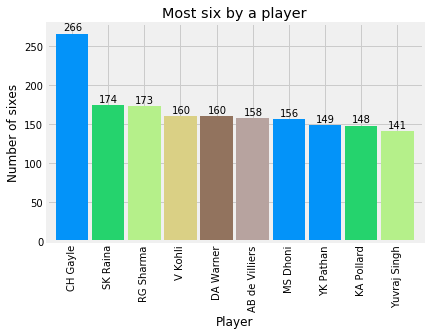

In [43]:
axes=pd.value_counts(six_df['batsman']).head(10).sort_values(ascending=False).head(10).plot.bar(color=sns.color_palette('terrain'), width=0.9)


for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.2, p.get_height() + 4))
plt.ylabel('Number of sixes')
plt.xlabel('Player')
plt.title("Most six by a player")

# Top 10 players with most runs

In [23]:
deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

Text(0.5,1,'Most Runs in IPL')

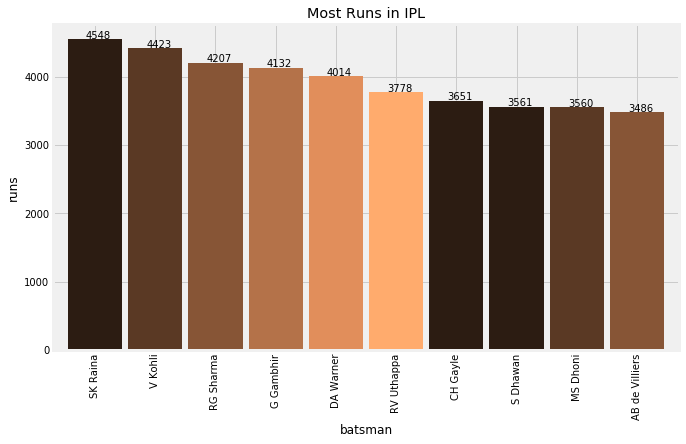

In [26]:
plt.figure(figsize=(10,6))
axes = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(color=sns.color_palette('copper'), width=0.9)

for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 10))
plt.ylabel('runs')
plt.xlabel('batsman')
plt.title("Most Runs in IPL")

# IPL winner of each season

In [67]:
win_team=matches.drop_duplicates(subset='season', keep='last')[['season','winner']]

In [70]:
win_team

,season,winner
58,2017,Mumbai Indians
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad


# Matches where MS Dhoni was man of the match and India won by more than 5 wickets

In [71]:
matches[(matches['player_of_match'] == 'MS Dhoni') & (matches['win_by_wickets'] > 5)][['team1','team2','player_of_match','win_by_wickets']]

,team1,team2,player_of_match,win_by_wickets
24,Sunrisers Hyderabad,Rising Pune Supergiant,MS Dhoni,6
227,Kings XI Punjab,Chennai Super Kings,MS Dhoni,6
509,Royal Challengers Bangalore,Chennai Super Kings,MS Dhoni,8


# Bowlers with most number of wickets

In [72]:
temp_df = deliveries.dropna(subset=['player_dismissed'])

In [73]:
temp_df.shape

(7438, 21)

In [74]:
temp_df = temp_df[temp_df['dismissal_kind'] != 'run out']

Text(0.5,1,'Most wickets in IPL')

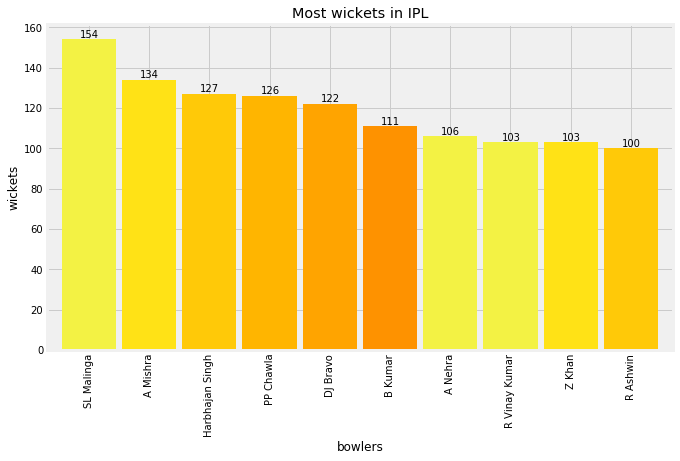

In [82]:
plt.figure(figsize=(10,6))
axes=pd.value_counts(temp_df['bowler']).sort_values(ascending=False).head(10).plot.bar(color=sns.color_palette('Wistia'), width=0.9)
for p in axes.patches:
    axes.annotate(format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 0.9))
plt.ylabel('wickets')
plt.xlabel('bowlers')
plt.title("Most wickets in IPL")